In [293]:
import json
import matplotlib.pyplot as plt


# код идентичный файлу main
# load a file with parameters of lines
with open('data/lines_and_trains.json', 'r', encoding='cp1251') as f:
    data = json.load(f)

# create a new useful dictionary
lines = []
atrribute = []
for i in data:
    # delite useless information
    del i['global_id']

    def line_sorted_f(line_):
        """
        Функция даёт линиям их номера (порядок в файле не совсем верный) и добавляет сокращенное название
        This function sets the numbers of the metro lines and add new parameter
        :param line_: dictionary with parameters of lines
        :return: NaN, function is refresh old lists
        """
        match line_['Line']:
            case ('Сокольническая линия'):
                lines.append('1')
                line_['Shortname'] = 'Сокольническая'
                atrribute.append(line_)

            case ('Замоскворецкая линия'):
                lines.append('2')
                line_['Shortname'] = 'ЗЛ'
                atrribute.append(line_)

            case ('Арбатско-Покровская линия'):
                lines.append('3')
                line_['Shortname'] = 'АПЛ'
                atrribute.append(line_)

            case('Филёвская линия'):
                lines.append('4')
                line_['Shortname'] = 'ФЛ'
                atrribute.append(line_)

            case('Кольцевая линия'):
                lines.append('5')
                line_['Shortname'] = 'Кольцевая'
                atrribute.append(line_)

            case ('Калужско-Рижская линия'):
                lines.append('6')
                line_['Shortname'] = 'КРЛ'
                atrribute.append(line_)

            case ('Таганско-Краснопресненская линия'):
                lines.append('7')
                line_['Shortname'] = 'ТКЛ'
                atrribute.append(line_)

            case ('Калининская линия'):
                lines.append('8')
                line_['Shortname'] = 'Калининская'
                atrribute.append(line_)

            case ('Солнцевская линия'):
                lines.append('8A')                      # соедените их уже((
                line_['Shortname'] = 'Солнцевкая'
                atrribute.append(line_)

            case ('Серпуховско-Тимирязевская линия'):
                lines.append('9')
                line_['Shortname'] = 'СТЛ'
                atrribute.append(line_)

            case ('Люблинско-Дмитровская линия'):
                lines.append('10')
                line_['Shortname'] = 'ЛДЛ'
                atrribute.append(line_)

            case ('Бутовская линия Лёгкого метро'):     # я и не думал что где-то ещё пишут про лёгкое метро
                lines.append('12')
                line_['Shortname'] = 'Бутовская'
                atrribute.append(line_)

            case ('Большая кольцевая линия'):
                lines.append('11')
                line_['Shortname'] = 'БКЛ'
                atrribute.append(line_)

            case ('Некрасовская линия'):
                lines.append('15')
                line_['Shortname'] = 'Некрасовская'
                atrribute.append(line_)

            case ('Московская монорельсовая транспортная система'):
                lines.append('13')
                line_['Shortname'] = 'Монорельс'
                atrribute.append(line_)

            case ('Московское центральное кольцо'):
                lines.append('14')
                line_['Shortname'] = 'МЦК'
                atrribute.append(line_)

            case ('Троицкая линия'):
                lines.append('16')
                line_['Shortname'] = 'Троицкая'
                atrribute.append(line_)

    line_sorted_f(i)

lines_and_trains = dict(zip(lines, atrribute))
'''
И того какие данные мы тут имеем:
['номер линии'] ['Line'] полное название
                ['MetroLineLength'] длинна линии
                ['NumberOfCarriages'] количество вагонов
                ['NumberOfStations'] количество станций
                ['Shortname'] коротное название
'''


# load a file with information about the execution of the schedule
with open('data/schedule_accuracy.json', 'r', encoding='cp1251') as f:
    data = json.load(f)

# creating a statistics list
''' 
AHTUNG 
firs quarter is 1q2021, last is 4q2024
if you use the data after 4q2024, then update the 'end_of_time' variable
'''
end_of_time = 16  # four years * 4 quarter
shedule_precision = []

# [line list]['line_number', 'statistics for a quarter']
for i in range(17):
    # it`s only for fix problem with 8A line
    if i < 8:
        quarter = [str(i + 1)]
    elif i > 8:
        quarter = [str(i)]
    else:
        quarter = ['8A']

    for j in range(1, end_of_time + 1):
        quarter.append(0)
    shedule_precision.append(quarter)

# copy the values from the file to the list
for i in data:
    for line in lines_and_trains:
        if i['Line'] == lines_and_trains[line]['Line']:

            # find information about quarter
            quarter_ = (int(i['Year']) - 2021) * 4
            match i['Quarter']:
                case('I квартал'): quarter_ += 1
                case('II квартал'): quarter_ += 2
                case('III квартал'): quarter_ += 3
                case('IV квартал'): quarter_ += 4

            # write statistics
            count = -1
            for k in shedule_precision:
                count += 1
                if (k[0]) == (line):
                    shedule_precision[count][quarter_] = i['Precision']


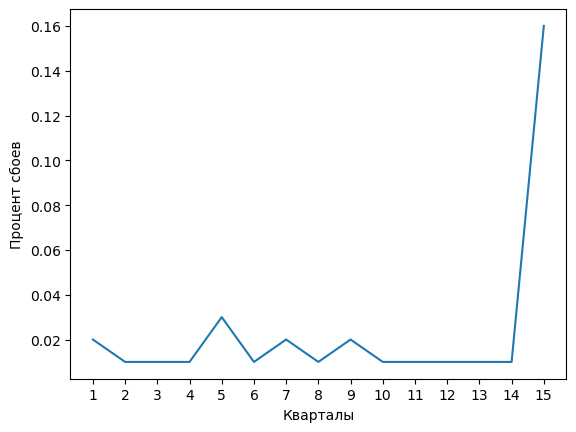

In [294]:
# анализ полученных данных


# quarters = x
x = []
for t in range(end_of_time - 1):
    x.append(str(t+1)) 

# начнём с того, что мы можем визуализировать количество сбоев по каждой линии в отдельности. Например для ТКЛ
# Line 7

for i in range(len(shedule_precision)):
    if shedule_precision[i][0] == '7':
        y = []
        for j in range(end_of_time - 1):
            # y % of failures
            y.append(100 - (shedule_precision[i][j+1]))
        plt.plot(x, y)
        plt.ylabel('Процент сбоев')
        plt.xlabel('Кварталы')
        plt.show()

 
# в целом всё достаточно стабильно, но в 3q2024 количество сбоев выглядит аномально. 
# часто число сбоев растёт в январе, такое происходит в 3/4 изученных месяцев

In [295]:
# посчитаем среднуюю длинну линии
lines_long = 0
for i in lines_and_trains:
    lines_long += (lines_and_trains[i]['MetroLineLength'])
print(f'Средняя длинна линии {(lines_long / 17)} киллометров')

# посчитаем среднуюю длинну перегона
peregons_count = 0
for i in lines_and_trains:
    peregons_count += (lines_and_trains[i]['NumberOfStations']) - 1
print(f'Средняя длинна перегона {(lines_long / peregons_count)} киллометров')


Средняя длинна линии 30.667058823529413 киллометров
Средняя длинна перегона 1.8102083333333334 киллометров


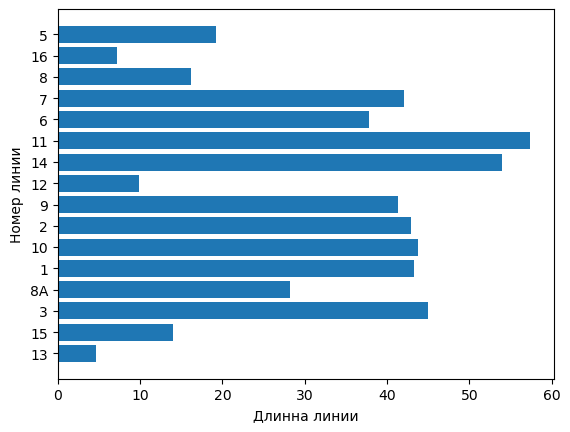

In [296]:
# теперь уравним данные за всё время и посмотрим на все линии вместе
# код явнот кривова, но я его пишу вторпях. проститево

line_inf_a = []
line_inf_b = []
line_inf_long = []

line_sorted = []
line_name_sorted = []
line_long_sorted = []

for i in range(len(shedule_precision)):
    working_quarters = 0
    
    for j in range(1, end_of_time):
        # исправление возможных исскажений для линий запущенных после 
        if (str(shedule_precision[i][j]) != '0'):
            working_quarters += 1 
    
    # создаем временные списоки, в которык заносим % сбоев и название линии
    line_inf_a.append(str(100 - (sum(shedule_precision[i][1:]) / working_quarters)))
    line_inf_b.append(shedule_precision[i][0])
    line_inf_long.append(lines_and_trains[shedule_precision[i][0]]['MetroLineLength'])

# создаем новый отсортированный список
line_sorted = sorted(line_inf_a)
for i in line_sorted:
    for j in line_inf_a:
        if i == j:
            line_name_sorted.append(line_inf_b[line_inf_a.index(j)])
            line_long_sorted.append(line_inf_long[line_inf_a.index(j)])


# строим графики
plt.barh(line_name_sorted, line_long_sorted)
plt.ylabel('Номер линии')
plt.xlabel('Длинна линии')
plt.show()


# весь блок кода выше был переписан 2 раза ради одного и того же графика, но он в очередной раз отказывается работать. 
# поэтому придется ограничиться данными для этого графика.
# я ухожу. Я сделал всё, что мог.

# plt.barh(str(line_sorted), line_name_sorted)
# plt.ylabel('Номер линии')
# plt.xlabel('Процент сбоев')
# plt.show()